# 배터리 데이터 처리 시스템 (Refactored)

이 노트북은 `dataprocess.py` 모듈을 사용하여 데이터를 로드하고 분석합니다.
디버깅 및 시각화를 위해 대화형으로 실행할 수 있습니다.

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import dataprocess
import importlib

# 모듈 수정 시 재로딩을 위해
importlib.reload(dataprocess)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 및 모듈 로딩 완료")

✅ 라이브러리 및 모듈 로딩 완료


In [37]:
# 분석할 경로 리스트 (사용자가 수정)
paths = [
    r"C:\Users\Ryu\Python_project\data\dataprocess\Rawdata\A1_MP1_4500mAh_T23_1",
    # 추가 경로를 여기에 입력하세요
    
]

print(f"분석 대상 경로 개수: {len(paths)}")

분석 대상 경로 개수: 1


In [38]:
# 데이터 처리 파이프라인 실행
df_results, loaded_data = dataprocess.process_battery_data(paths)

# 결과 요약 확인
display(df_results[['folder_name', 'cycler_type', 'capacity_mAh']])

🔋 배터리 데이터 처리 파이프라인 시작

[1/1] 처리 중: A1_MP1_4500mAh_T23_1
----------------------------------------------------------------------
  📁 폴더명: A1_MP1_4500mAh_T23_1
  🔧 사이클러 타입: PNE
  ⚡ 용량: 4500.0 mAh
  📊 발견된 채널: 2개
    - M02Ch073[073] 로딩 중...
      ✓ 사이클 데이터: 4,887행
      ✓ 프로파일 데이터: 571,587행
    - M02Ch074[074] 로딩 중...
      ✓ 사이클 데이터: 4,887행
      ✓ 프로파일 데이터: 571,833행

✅ 데이터 처리 완료


,folder_name,cycler_type,capacity_mAh
0,A1_MP1_4500mAh_T23_1,PNE,4500.0


## 로드된 데이터 상세 탐색

In [39]:
# loaded_data 상세 탐색
print("="*70)
print("📊 loaded_data 상세 정보")
print("="*70)

# 1. 전체 구조 확인
print("\n🔍 1. 전체 구조:")
for data_type, data_dict in loaded_data.items():
    print(f"  {data_type}: {len(data_dict)}개 채널")
    if data_dict:
        for key in data_dict.keys():
            print(f"    - {key}")

# 2. PNE 사이클 데이터 상세 정보
if loaded_data['pne_cycle']:
    print("\n" + "="*70)
    print("📌 2. PNE 사이클 데이터 상세 정보")
    print("="*70)
    for key, df in loaded_data['pne_cycle'].items():
        print(f"\n채널: {key}")
        print(f"  - 행 개수: {len(df):,}")
        print(f"  - 열 개수: {len(df.columns)}")
        print(f"  - 열 이름: {list(df.columns)}")
        print(f"  - 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        if 'Cycle' in df.columns:
             print(f"  - 사이클 범위: {df['Cycle'].min()} ~ {df['Cycle'].max()}")
        
        print(f"\n  통계 정보:")
        if 'DchgCap_mAh' in df.columns:
            print(f"    방전용량 평균: {df['DchgCap_mAh'].mean():.2f} mAh")
            print(f"    방전용량 최대: {df['DchgCap_mAh'].max():.2f} mAh")
            print(f"    방전용량 최소: {df['DchgCap_mAh'].min():.2f} mAh")
        if 'Temp_C' in df.columns:
            print(f"    온도 평균: {df['Temp_C'].mean():.2f} °C")

# 3. PNE 프로파일 데이터 상세 정보
if loaded_data['pne_profile']:
    print("\n" + "="*70)
    print("📌 3. PNE 프로파일 데이터 상세 정보")
    print("="*70)
    for key, df in loaded_data['pne_profile'].items():
        print(f"\n채널: {key}")
        print(f"  - 행 개수: {len(df):,}")
        print(f"  - 열 개수: {len(df.columns)}")
        print(f"  - 열 이름: {list(df.columns)}")
        print(f"  - 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        if 'voltage_v' in df.columns:
            print(f"    전압 평균: {df['voltage_v'].mean():.2f} V")
            print(f"    전압 범위: {df['voltage_v'].min():.2f} ~ {df['voltage_v'].max():.2f} V")
        if 'current_mA' in df.columns:
            print(f"    전류 평균: {df['current_mA'].mean():.2f} mA")

# 4. Toyo 데이터 상세 정보
if loaded_data['toyo_cycle']:
    print("\n" + "="*70)
    print("📌 4. Toyo 사이클 데이터 상세 정보")
    print("="*70)
    for key, df in ak['toyo_cycle'].items():
        print(f"\n채  널: {key}")
        print(f"  - 행 개수: {len(df):,}")
        print(f"  - 열 개수: {len(df.columns)}")
        print(f"  - 열 이름: {list(df.columns)}")
        if 'Cycle' in df.columns:
             print(f"  - 사이클 범위: {df['Cycle'].min()} ~ {df['Cycle'].max()}")

if loaded_data['toyo_profile']:
    print("\n" + "="*70)
    print("📌 5. Toyo 프로파일 데이터 상세 정보")
    print("="*70)
    for key, df in loaded_data['toyo_profile'].items():
        print(f"\n채널: {key}")
        print(f"  - 행 개수: {len(df):,}")
        print(f"  - 열 개수: {len(df.columns)}")
        print(f"  - 열 이름: {list(df.columns)}")

print("\n" + "="*70)

📊 loaded_data 상세 정보

🔍 1. 전체 구조:
  pne_cycle: 2개 채널
    - A1_MP1_4500mAh_T23_1_M02Ch073[073]
    - A1_MP1_4500mAh_T23_1_M02Ch074[074]
  pne_profile: 2개 채널
    - A1_MP1_4500mAh_T23_1_M02Ch073[073]
    - A1_MP1_4500mAh_T23_1_M02Ch074[074]
  toyo_cycle: 0개 채널
  toyo_profile: 0개 채널

📌 2. PNE 사이클 데이터 상세 정보

채널: A1_MP1_4500mAh_T23_1_M02Ch073[073]
  - 행 개수: 4,887
  - 열 개수: 13
  - 열 이름: ['Cycle', 'Condition', 'ChgCap_mAh', 'DchgCap_mAh', 'OCV_mV', 'imp', 'VoltageMax_mV', 'ChgPow_mW', 'DchgPow_mW', 'Steptime_s', 'Temp_C', 'EndState', 'Current_mA']
  - 메모리 사용량: 0.48 MB
  - 사이클 범위: 1 ~ 601

  통계 정보:
    방전용량 평균: 1035.78 mAh
    방전용량 최대: 4649.32 mAh
    방전용량 최소: 0.00 mAh
    온도 평균: 23.68 °C

채널: A1_MP1_4500mAh_T23_1_M02Ch074[074]
  - 행 개수: 4,887
  - 열 개수: 13
  - 열 이름: ['Cycle', 'Condition', 'ChgCap_mAh', 'DchgCap_mAh', 'OCV_mV', 'imp', 'VoltageMax_mV', 'ChgPow_mW', 'DchgPow_mW', 'Steptime_s', 'Temp_C', 'EndState', 'Current_mA']
  - 메모리 사용량: 0.48 MB
  - 사이클 범위: 1 ~ 601

  통계 정보:
    방전용량 평균: 1037.2

## Profile 데이터 분석

Profile 데이터를 상세히 분석하고 시각화합니다.

In [40]:
import profile_analyzer

# 모듈 수정 시 재로딩
importlib.reload(profile_analyzer)

print("✅ Profile Analyzer 모듈 로딩 완료")

✅ Profile Analyzer 모듈 로딩 완료


### 1. Profile 데이터 구조 분석

In [41]:
# Profile 데이터 구조 분석
profile_summary = profile_analyzer.analyze_profile_structure(loaded_data)

# 요약 테이블 표시
display(profile_summary)

📊 PROFILE 데이터 구조 분석

🔧 PNE Profile 데이터:
--------------------------------------------------------------------------------

채널: A1_MP1_4500mAh_T23_1_M02Ch073[073]
  - 행 개수: 571,587
  - 컬럼: ['index', 'time_day', 'time_s', 'Voltage_V', 'Current_mA', 'Temp_C', 'ChgCap_mAh', 'DchgCap_mAh', 'Condition', 'EndState', 'step', 'Steptime_s', 'Cycle', 'time_min', 'time_hour']
  - Condition 고유값: [np.int64(1), np.int64(2), np.int64(3)]
    • Condition 1: 330,994행
    • Condition 2: 225,593행
    • Condition 3: 15,000행
  - EndState 고유값: [np.int64(0), np.int64(64), np.int64(65), np.int64(66), np.int64(78), np.int64(152)]...
  - Step 고유값 개수: 139
  - Step 범위: 2 ~ 168

채널: A1_MP1_4500mAh_T23_1_M02Ch074[074]
  - 행 개수: 571,833
  - 컬럼: ['index', 'time_day', 'time_s', 'Voltage_V', 'Current_mA', 'Temp_C', 'ChgCap_mAh', 'DchgCap_mAh', 'Condition', 'EndState', 'step', 'Steptime_s', 'Cycle', 'time_min', 'time_hour']
  - Condition 고유값: [np.int64(1), np.int64(2), np.int64(3)]
    • Condition 1: 331,527행
    • Condit

,channel,type,rows,columns,conditions,steps,voltage_range,current_range
0,A1_MP1_4500mAh_T23_1_M02Ch073[073],PNE,571587,15,3,139,N/A,N/A
1,A1_MP1_4500mAh_T23_1_M02Ch074[074],PNE,571833,15,3,139,N/A,N/A


### 2. 샘플 채널 선택 및 상세 분석

In [42]:
# 첫 번째 PNE profile 데이터 선택
if loaded_data['pne_profile']:
    sample_key = list(loaded_data['pne_profile'].keys())[0]
    sample_df = loaded_data['pne_profile'][sample_key]
    
    print(f"선택된 채널: {sample_key}")
    print(f"데이터 shape: {sample_df.shape}")
    print(f"\n컬럼 목록:")
    print(sample_df.columns.tolist())
    
    # 데이터 요약
    summary = profile_analyzer.get_profile_summary(sample_df)
    print(f"\n데이터 요약:")
    for key, value in summary.items():
        print(f"  {key}: {value}")
    
    # 처음 몇 행 표시
    print(f"\n데이터 샘플:")
    display(sample_df.head(10))
else:
    print("⚠️  PNE profile 데이터가 없습니다.")

선택된 채널: A1_MP1_4500mAh_T23_1_M02Ch073[073]
데이터 shape: (571587, 15)

컬럼 목록:
['index', 'time_day', 'time_s', 'Voltage_V', 'Current_mA', 'Temp_C', 'ChgCap_mAh', 'DchgCap_mAh', 'Condition', 'EndState', 'step', 'Steptime_s', 'Cycle', 'time_min', 'time_hour']

데이터 요약:
  total_rows: 571587
  columns: ['index', 'time_day', 'time_s', 'Voltage_V', 'Current_mA', 'Temp_C', 'ChgCap_mAh', 'DchgCap_mAh', 'Condition', 'EndState', 'step', 'Steptime_s', 'Cycle', 'time_min', 'time_hour']
  time_range: 0.00 ~ 7696100.80 s
  voltage_range: N/A
  current_range: N/A
  conditions: [2, 3, 1]
  steps: 139

데이터 샘플:


,index,time_day,time_s,Voltage_V,Current_mA,Temp_C,ChgCap_mAh,DchgCap_mAh,Condition,EndState,step,Steptime_s,Cycle,time_min,time_hour
0,1,0.000000,0.0,3784.816,0.000,23.412,0.0,0.000,2,0,2,0.0,1,0.000000,0.000000
1,2,0.000001,0.1,3759.293,-899.888,23.412,0.0,0.012,2,0,2,0.1,1,0.001667,0.000028
2,3,0.000694,60.0,3742.342,-899.952,22.959,0.0,14.987,2,0,2,60.0,1,1.000000,0.016667
3,4,0.001389,120.0,3737.240,-899.988,22.868,0.0,29.987,2,0,2,120.0,1,2.000000,0.033333
4,5,0.002083,180.0,3733.113,-899.942,22.950,0.0,44.987,2,0,2,180.0,1,3.000000,0.050000
5,6,0.002778,240.0,3729.280,-900.014,22.979,0.0,59.987,2,0,2,240.0,1,4.000000,0.066667
6,7,0.003472,300.0,3725.805,-899.966,23.029,0.0,74.987,2,0,2,300.0,1,5.000000,0.083333
7,8,0.004167,360.0,3722.745,-899.998,23.111,0.0,89.986,2,0,2,360.0,1,6.000000,0.100000
8,9,0.004861,420.0,3719.896,-900.024,23.190,0.0,104.986,2,0,2,420.0,1,7.000000,0.116667
9,10,0.005556,480.0,3717.521,-899.978,23.111,0.0,119.986,2,0,2,480.0,1,8.000000,0.133333


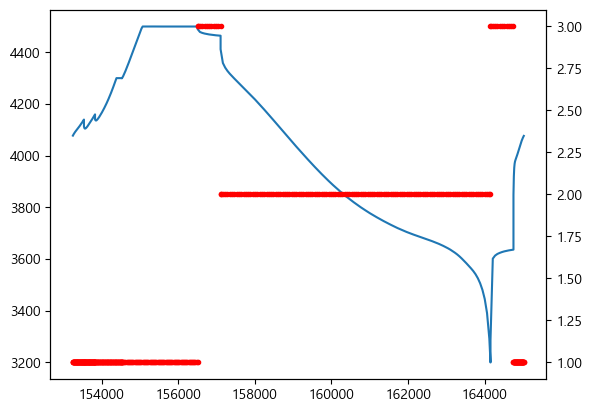

In [ ]:
init = 53940
end = 54400

# 'Cycle' 컬럼을 기준으로 데이터프레임을 분할하여 리스트로 저장
cycle_list = [group for _, group in sample_df.groupby('Cycle')]

fig, ax1 = plt.subplots()

ax1.plot(df['time_s'][init:end], df['Voltage_V'][init:end])
ax2 = ax1.twinx()
ax2.plot(df['time_s'][init:end], df['Condition'][init:end], 'r.')


### 3. Condition 분포 시각화

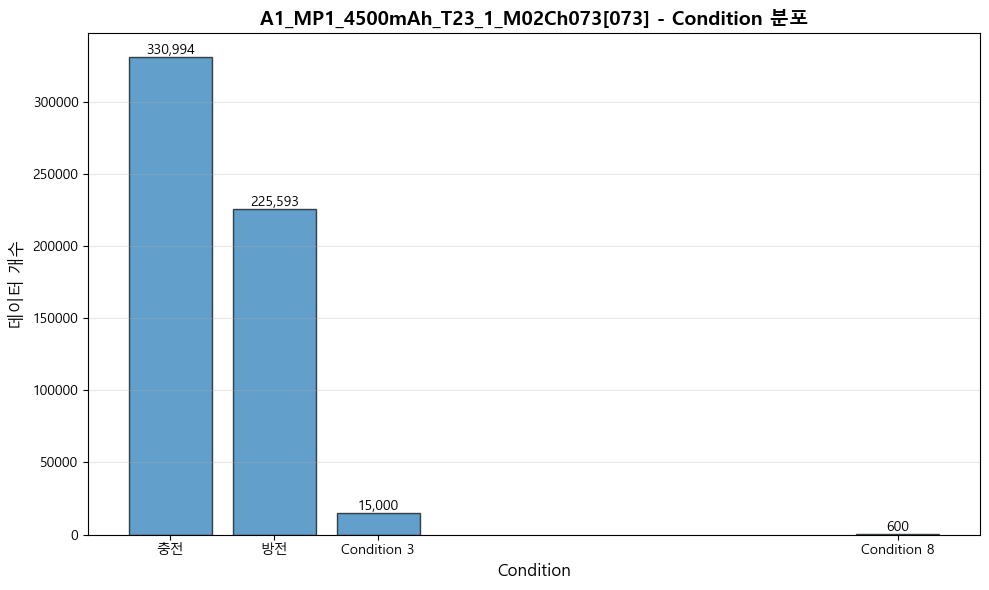

In [15]:
# Condition 분포 시각화
if 'sample_df' in locals():
    profile_analyzer.visualize_condition_distribution(sample_df, 
                                                      title=f"{sample_key} - Condition 분포")
else:
    print("⚠️  샘플 데이터가 없습니다.")

### 4. 전체 Profile 개요 시각화

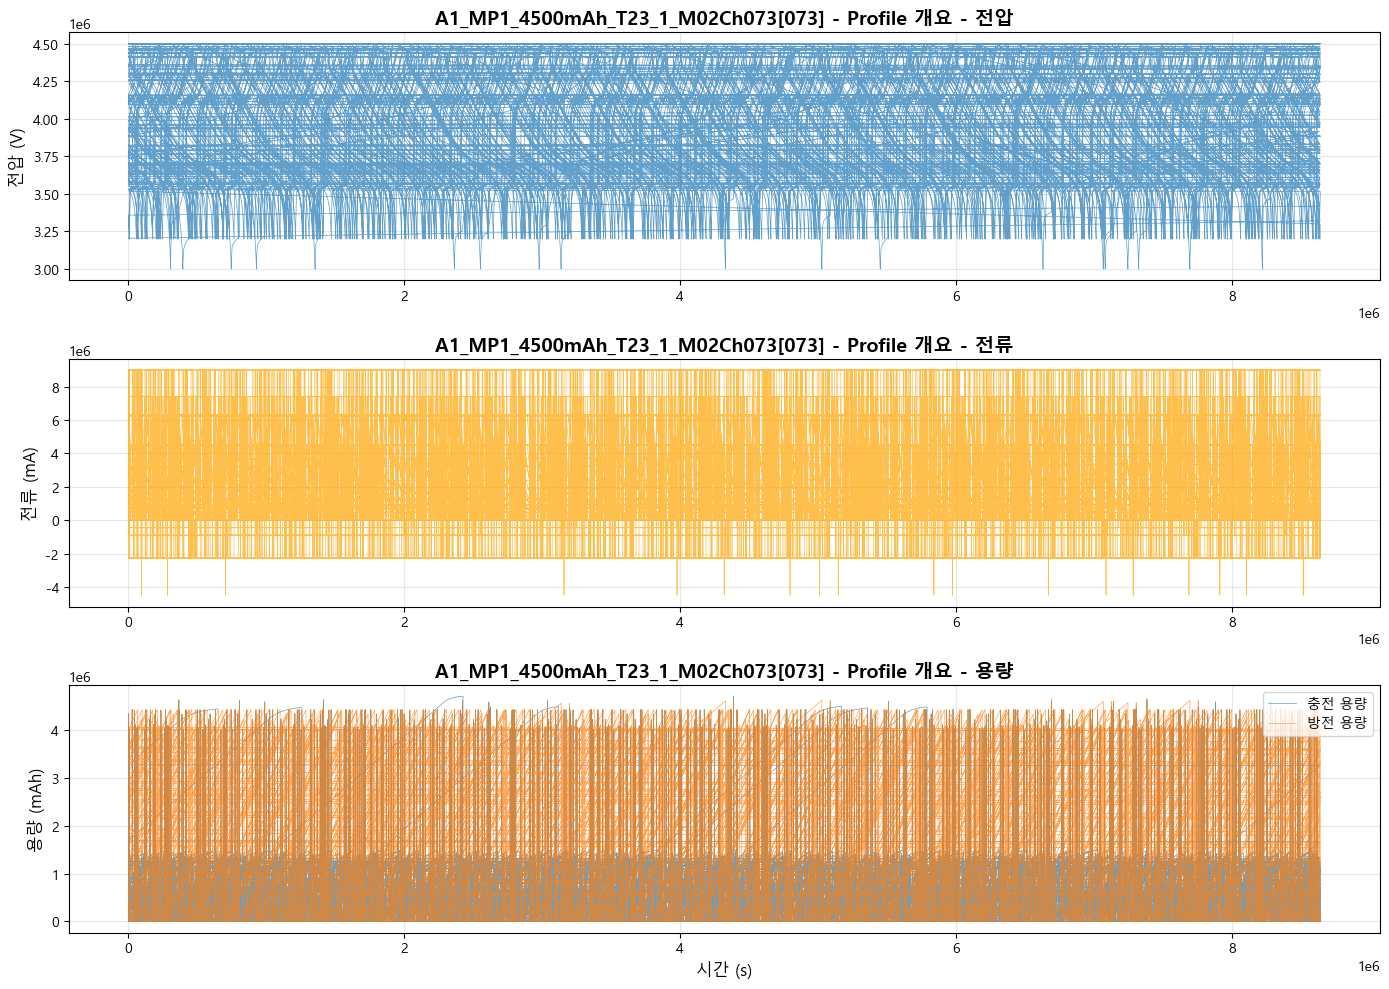

In [16]:
# 전체 profile 개요 시각화
if 'sample_df' in locals():
    profile_analyzer.visualize_profile_overview(sample_df, 
                                               title=f"{sample_key} - Profile 개요")
else:
    print("⚠️  샘플 데이터가 없습니다.")

### 5. 충전 데이터 필터링 및 분석

✓ 충전 데이터 필터링: 330,994행 (전체의 57.8%)


c:\Users\Ryu\Python_project\data\dataprocess\profile_analyzer.py:288: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


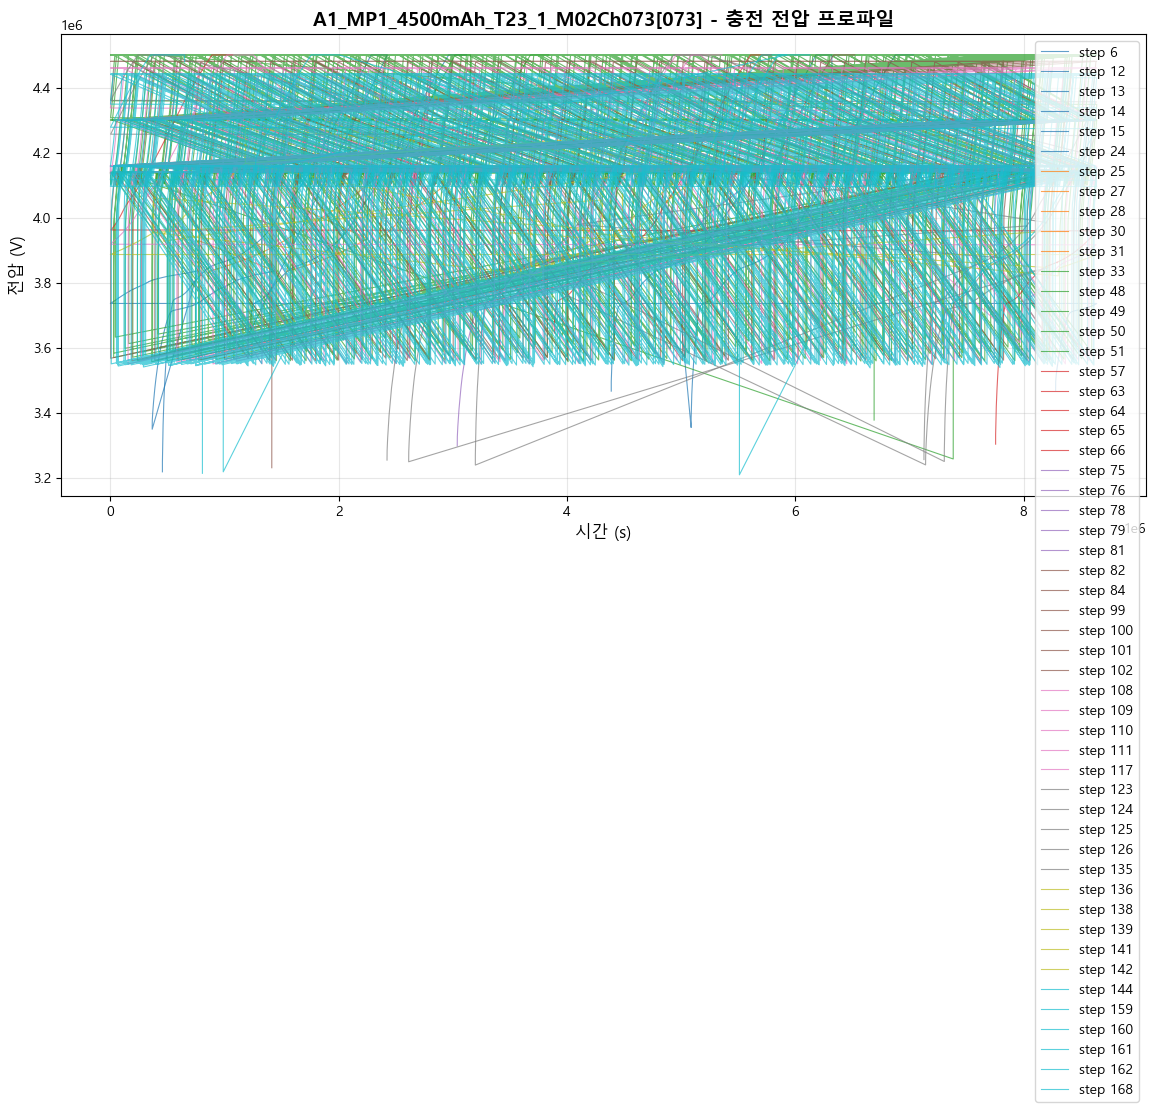

In [17]:
# 충전 데이터만 필터링 (Condition = 1)
if 'sample_df' in locals():
    charge_df = profile_analyzer.filter_by_condition(sample_df, condition=1)
    
    # 충전 전압 프로파일 시각화
    if not charge_df.empty:
        profile_analyzer.visualize_voltage_profile(charge_df, 
                                                   color_by='step',
                                                   title=f"{sample_key} - 충전 전압 프로파일")
else:
    print("⚠️  샘플 데이터가 없습니다.")

### 6. 방전 데이터 필터링 및 분석

✓ 방전 데이터 필터링: 225,593행 (전체의 39.4%)


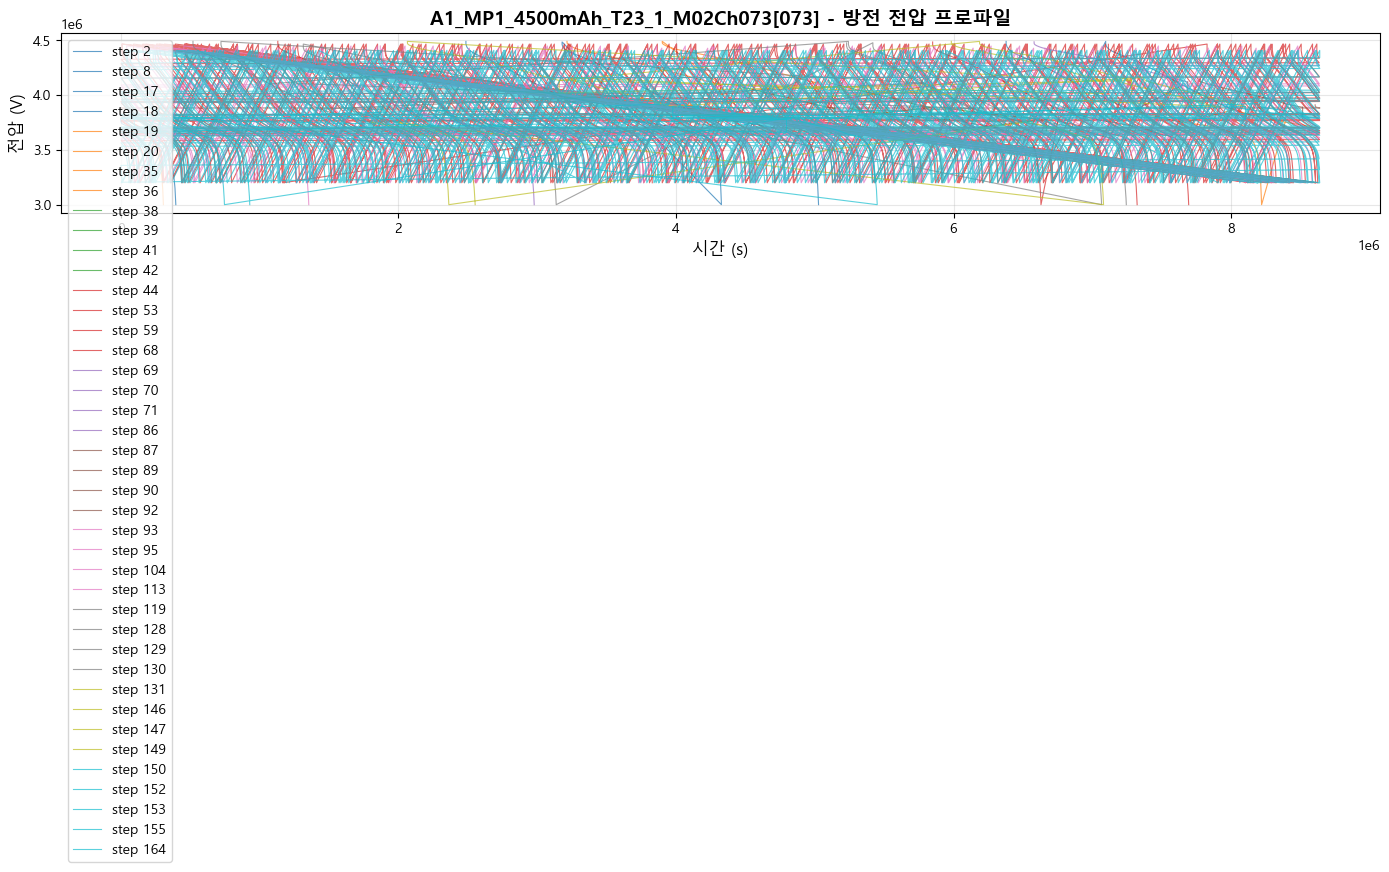

In [18]:
# 방전 데이터만 필터링 (Condition = 2)
if 'sample_df' in locals():
    discharge_df = profile_analyzer.filter_by_condition(sample_df, condition=2)
    
    # 방전 전압 프로파일 시각화
    if not discharge_df.empty:
        profile_analyzer.visualize_voltage_profile(discharge_df, 
                                                   color_by='step',
                                                   title=f"{sample_key} - 방전 전압 프로파일")
else:
    print("⚠️  샘플 데이터가 없습니다.")

### 7. CCCV 충전 구간 식별

✓ CCCV 구간 식별 완료:
  - CC (정전류) 구간: 328,597행 (99.3%)
  - CV (정전압) 구간: 2,397행 (0.7%)


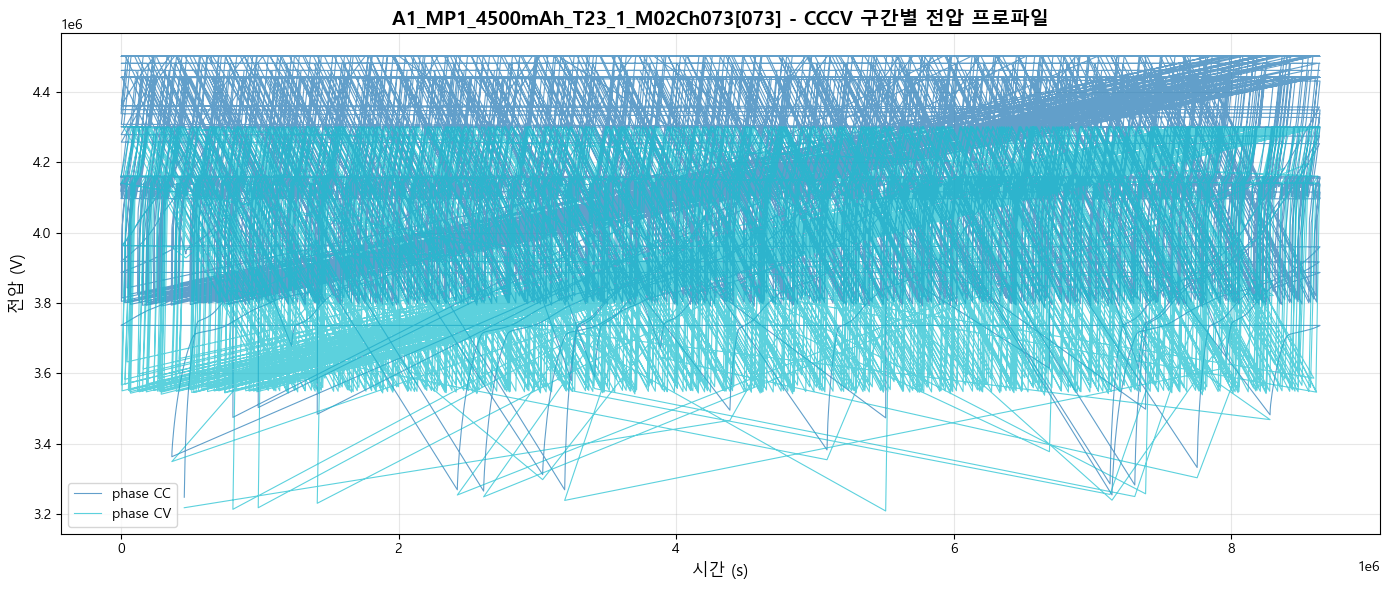

In [19]:
# 충전 데이터에서 CCCV 구간 식별
if 'charge_df' in locals() and not charge_df.empty:
    charge_cccv = profile_analyzer.identify_cccv_phases(charge_df, cv_current_threshold=50.0)
    
    # CCCV 구간별 전압 프로파일
    profile_analyzer.visualize_voltage_profile(charge_cccv, 
                                              color_by='phase',
                                              title=f"{sample_key} - CCCV 구간별 전압 프로파일")
else:
    print("⚠️  충전 데이터가 없습니다.")

### 8. 사이클별 용량 변화 분석

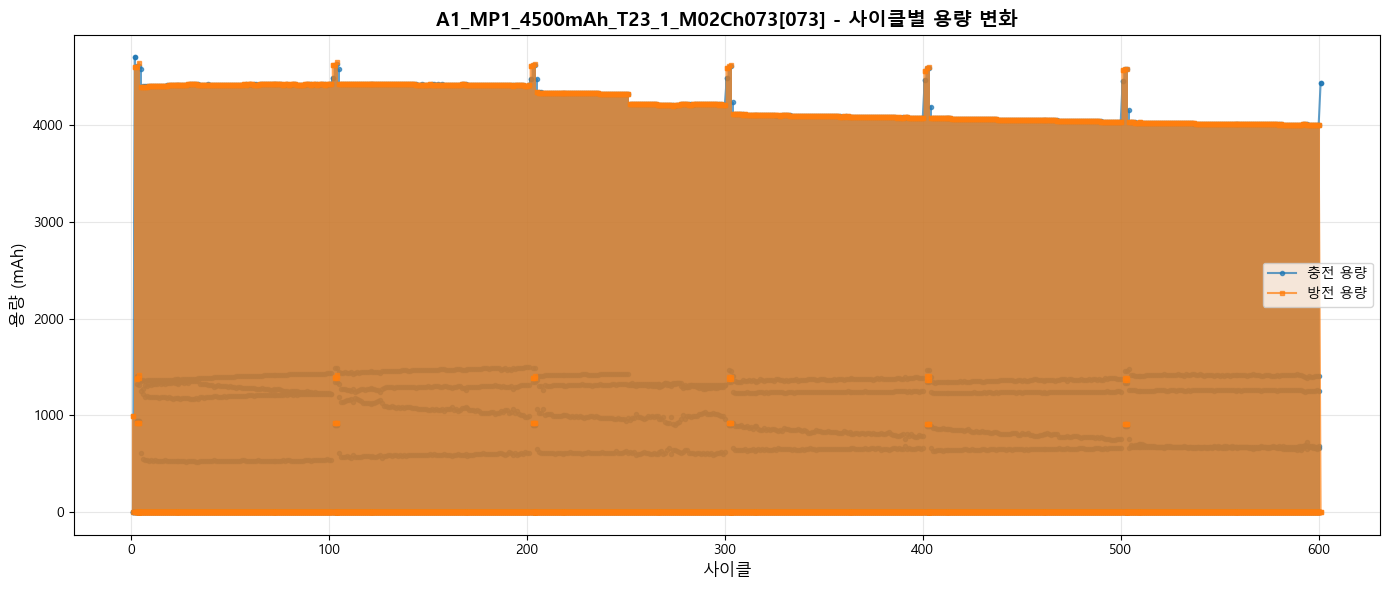

✓ RPT 사이클 식별: 12개
  - 사이클 번호: [np.int64(50), np.int64(100), np.int64(150), np.int64(200), np.int64(250), np.int64(300), np.int64(350), np.int64(400), np.int64(450), np.int64(500)]...


In [20]:
# 사이클 데이터에서 용량 변화 시각화
if loaded_data['pne_cycle']:
    cycle_key = list(loaded_data['pne_cycle'].keys())[0]
    cycle_df = loaded_data['pne_cycle'][cycle_key]
    
    profile_analyzer.visualize_capacity_evolution(cycle_df, 
                                                  title=f"{cycle_key} - 사이클별 용량 변화")
    
    # RPT 사이클 식별 (50 사이클마다)
    rpt_cycles = profile_analyzer.identify_rpt_cycles(cycle_df, rpt_pattern=50)
else:
    print("⚠️  PNE cycle 데이터가 없습니다.")

### 9. 커스텀 분석 (사용자 정의)

아래 셀에서 자유롭게 분석을 수행하세요.

In [21]:
# 예제: 특정 step만 필터링
# filtered_df = profile_analyzer.filter_by_step(sample_df, steps=[1, 2, 3])

# 예제: 전류 프로파일 시각화
# profile_analyzer.visualize_current_profile(sample_df, title="전류 프로파일")

print("이 셀에서 커스텀 분석을 수행하세요.")

이 셀에서 커스텀 분석을 수행하세요.
